In [1]:
import matplotlib.pyplot as plt
import numpy as np

from monte_carlo_DLA import MonteCarloDLA, MonteCarloDLAManager
from simulation_manager import SimulationManager

In [2]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Excercise B

In [3]:
# # Compare diffusion DLA vs monte carlo DLA

# diffusion_sim = None
# monte_carlo_sim = MonteCarloDLA(N=100, sticking_probability=1)

# print(f"Density diffusion: {}")

## Excercise c


Running sticking probability: 0.90

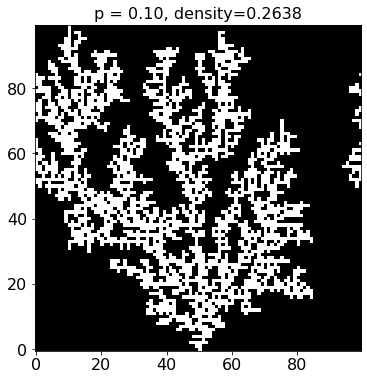

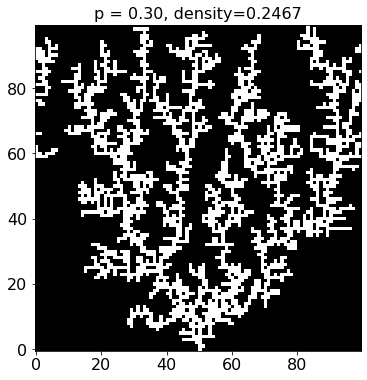

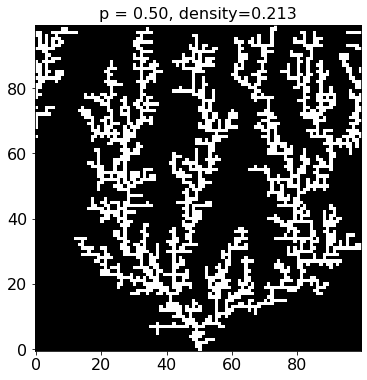

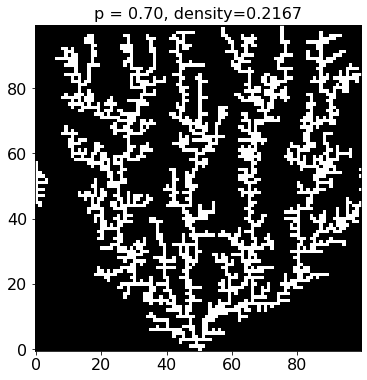

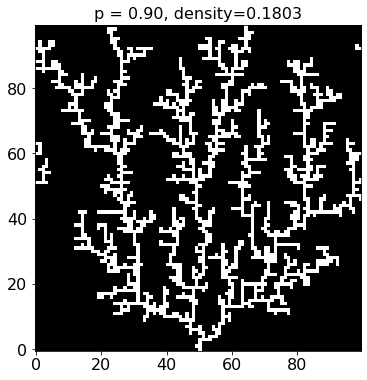

In [4]:
# Plot end result of different structures with different probabilities
ps = np.arange(0.1, 1.1, 0.2)
for p in ps:
    print(f"\rRunning sticking probability: {p:.2f}", end="")

    sim = MonteCarloDLA(N=100, sticking_probability=p)
    sim.run()
    sim.create_plot()

plt.show()


Running sticking probability: 1.00

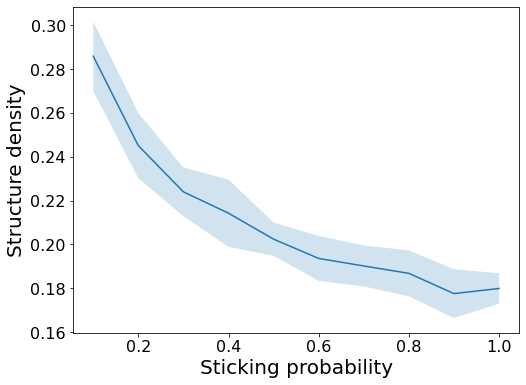

In [5]:
# Plot the density as a function of the sticking probability
N = 100
n_instances = 20

density_means = []
density_stds = []

ps = np.arange(0.1, 1.1, 0.1)
for p in ps:
    print(f"\rRunning sticking probability: {p:.2f}", end="")

    sim_manager = SimulationManager(MonteCarloDLA, n_instances, N=N, sticking_probability=p)
    mean, std = sim_manager.calc_attribute(lambda sim: sim.calc_density())
    density_means.append(mean)
    density_stds.append(std)

density_means = np.array(density_means)
density_stds = np.array(density_stds)

plt.plot(ps, density_means)
plt.fill_between(ps, density_means - density_stds, density_means + density_stds, alpha=0.2)
plt.xlabel("Sticking probability")
plt.ylabel("Structure density")
plt.show()